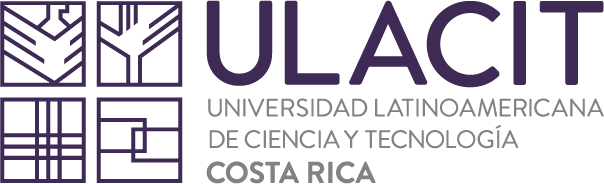

Psicologia de la Toma de Decisiones

Profesor: Juan Villalobos Ramirez

Alumnos:


Maximiliano Esquivel

Alejandro Sandoval 

Karina Castillo

Eduardo Castillo <3


# Introduccion

En este caso, se presentan un dataset asociado a clientes que no se presentan a una cita previamente programada. Esto presenta un costo de oportunidad para la organización, ya que se deja de percibir ingreso, mientras que el costo directo de atender esta cita se mantiene. De esta
manera, los principales aspectos a atacar son dos:

1. Maneras en qué la organización puede reducir es la tasa de ausencia a citas programadas,
y de esta manera disminuir esta pérdida.
2. Aumentar la ocupación efectiva del personal, de tal manera que la tasa de ocupación sea lo
más cercana al 100% de utilización.

El que no se presenten tiene un costo para nosotros, por lo tanto importante averiguar dicho valor.


# Desarrollo

In [1]:
## Importamos Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)
%matplotlib inline


In [2]:
#config settings

# options: gauss,nn,randomForest
modelName="nn"



In [3]:
## Definimos el Dataframe

df_citas = pd.read_csv('medical_no_show.csv')
df_citas.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# Buscamos datos faltantes/nulos
df_citas.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# Sacamos los datos estadisticos basicos de todas las variables
df_citas.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Revisar 

Scholarship 	
Hipertension 	
Diabetes 	
Alcoholism 	
Handcap 	
SMS_received

In [7]:
# Revisamos el formato de todas las variables
df_citas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
## Contamos valores en columnas
for i in df_citas.columns:

  print(f'Column name: {i}\n')
  print(round(100*df_citas[i].value_counts()/len(df_citas)),0)
  print('----------')

Column name: PatientId

8.221459e+14    0.0
9.963767e+10    0.0
2.688613e+13    0.0
3.353478e+13    0.0
6.264199e+12    0.0
               ... 
8.622636e+11    0.0
9.267587e+12    0.0
5.764356e+12    0.0
5.712491e+12    0.0
1.557663e+13    0.0
Name: PatientId, Length: 62299, dtype: float64 0
----------
Column name: AppointmentID

5642903    0.0
5692618    0.0
5687640    0.0
5740664    0.0
5740598    0.0
          ... 
5718442    0.0
5426425    0.0
5424230    0.0
5720832    0.0
5629448    0.0
Name: AppointmentID, Length: 110527, dtype: float64 0
----------
Column name: Gender

F    65.0
M    35.0
Name: Gender, dtype: float64 0
----------
Column name: ScheduledDay

2016-05-06T07:09:54Z    0.0
2016-05-06T07:09:53Z    0.0
2016-04-25T17:18:27Z    0.0
2016-04-25T17:17:46Z    0.0
2016-04-25T17:17:23Z    0.0
                       ... 
2016-05-02T09:53:25Z    0.0
2016-05-30T09:12:28Z    0.0
2016-05-16T09:10:04Z    0.0
2016-05-09T10:17:48Z    0.0
2016-04-27T13:30:56Z    0.0
Name: ScheduledDay, 

Revición de  duplicados de los datos de PatientId 

In [9]:
df_dup = pd.DataFrame(df_citas)
df_dup

df_dup.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [10]:
df_dup.duplicated().sum()

0

**Cambio de Formatos**

In [11]:
#Formato de ScheduleDay y AppointmentDay a datetime
#convertimos valores a fecha
from datetime import datetime

DateAppointmentDay = df_citas['AppointmentDay'] = pd.to_datetime(df_citas['AppointmentDay'])
DateScheduledDay = df_citas['ScheduledDay'] = pd.to_datetime(df_citas['ScheduledDay'])


In [12]:
#Formato de Gender, de object a int
Gender = {'M': 1,'F': 0}
df_citas.Gender = [Gender[item] for item in df_citas.Gender]


In [13]:
#Formato de No Show de Object a Int
df_citas.rename(columns = {'No-show':'Noshow'}, inplace = True)

Noshow = {'Yes': 1,'No': 0}
df_citas.Noshow = [Noshow[item] for item in df_citas.Noshow]

In [14]:
df_citas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  int64              
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  Noshow        

In [15]:
#Generamos variable de dias de diferencia e imprimimos 
DaysDiff = DateAppointmentDay - DateScheduledDay
print(DaysDiff)

0        -1 days +05:21:52
1        -1 days +07:51:33
2        -1 days +07:40:56
3        -1 days +06:30:29
4        -1 days +07:52:37
                ...       
110522    34 days 14:44:25
110523    34 days 16:32:27
110524    40 days 07:56:08
110525    40 days 08:50:37
110526    40 days 10:29:04
Length: 110527, dtype: timedelta64[ns]


In [16]:
df_citas['DaysDiff'] = DaysDiff.dt.days

df_citas

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,DaysDiff
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,34
110523,3.596266e+12,5650093,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,34
110524,1.557663e+13,5630692,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,40
110525,9.213493e+13,5630323,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,40


In [17]:
100*df_citas.Neighbourhood.value_counts().head(30)/len(df_citas)

JARDIM CAMBURI         6.982004
MARIA ORTIZ            5.252110
RESISTÊNCIA            4.008975
JARDIM DA PENHA        3.507740
ITARARÉ                3.179314
CENTRO                 3.016458
TABUAZEIRO             2.833697
SANTA MARTHA           2.832792
JESUS DE NAZARETH      2.581270
BONFIM                 2.508889
SANTO ANTÔNIO          2.484461
SANTO ANDRÉ            2.326128
CARATOÍRA              2.320700
JABOUR                 2.270034
SÃO PEDRO              2.214843
ILHA DO PRÍNCIPE       2.050178
NOVA PALESTINA         2.048368
ANDORINHAS             2.046559
DA PENHA               2.005845
ROMÃO                  2.004035
GURIGICA               1.825798
SÃO JOSÉ               1.788703
BELA VISTA             1.725370
MARUÍPE                1.720846
FORTE SÃO JOÃO         1.709085
ILHA DE SANTA MARIA    1.705466
SÃO CRISTÓVÃO          1.661133
REDENÇÃO               1.405087
SÃO BENEDITO           1.301944
JOANA D´ARC            1.291087
Name: Neighbourhood, dtype: float64

In [18]:
# Value Counts de la columna Neighbourhood
df_citas.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [19]:
#Diccionario que asocie cada barrio con su estado correspondiente
barrios_estados = {
    'JARDIM CAMBURI' : 'Espirito Santo', 
    'MARIA ORTIZ' : 'Espirito Santo', 
    'RESISTÊNCIA' : 'Espirito Santo', 
    'JARDIM DA PENHA' : 'Espirito Santo', 
    'TABUAZEIRO' : 'Espirito Santo', 
    'JESUS DE NAZARETH' : 'Espirito Santo',
    'CARATOÍRA' : 'Espirito Santo', 
    'ILHA DO PRÍNCIPE' : 'Espirito Santo', 
    'NOVA PALESTINA' : 'Espirito Santo', 
    'GURIGICA' : 'Espirito Santo', 
    'MARUÍPE' : 'Espirito Santo', 
    'FORTE SÃO JOÃO' : 'Espirito Santo', 
    'ILHA DE SANTA MARIA' : 'Espirito Santo', 
    'PRAIA DO SUÁ' : 'Espirito Santo', 
    'ILHA DAS CAIEIRAS' : 'Espirito Santo', 
    'GRANDE VITÓRIA' : 'Espirito Santo', 
    'FONTE GRANDE' : 'Espirito Santo', 
    'MATA DA PRAIA' : 'Espirito Santo', 
    'ILHAS OCEÂNICAS DE TRINDADE' : 'Espirito Santo',
    'DO CABRAL' : 'Espirito Santo', 
    'ESTRELINHA' : 'Espirito Santo', 
    'SOLON BORGES' : 'Espirito Santo', 
    'SEGURANÇA DO LAR' : 'Espirito Santo', 
    'MORADA DE CAMBURI' : 'Espirito Santo', 
    'PONTAL DE CAMBURI' : 'Espirito Santo',
    'ILHA DO BOI' : 'Espirito Santo', 
    'ILHA DO FRADE'  : 'Espirito Santo',
    'DO MOSCOSO'  : 'Espirito Santo', 
    'MÁRIO CYPRESTE'  : 'Espirito Santo', 
    'COMDUSA'  : 'Espirito Santo', 
    'ARIOVALDO FAVALESSA'  : 'Espirito Santo', 
    'ANTÔNIO HONÓRIO'  : 'Espirito Santo', 
    'FRADINHOS'  : 'Espirito Santo', 
    'ENSEADA DO SUÁ'  : 'Espirito Santo',
    'INHANGUETÁ' : 'Espirito Santo', 
    'BENTO FERREIRA' : 'Espirito Santo', 
    'VILA RUBIM' : 'Espirito Santo', 
    'PARQUE MOSCOSO' : 'Espirito Santo', 
    'GOIABEIRAS' : 'Espirito Santo', 
    'JUCUTUQUARA' : 'Espirito Santo', 
    'ITARARÉ' : 'São Paulo', 
    'SANTO ANDRÉ' : 'São Paulo', 
    'SÃO PEDRO' : 'São Paulo', 
    'DO QUADRO' : 'São Paulo', 
    'REPÚBLICA' : 'São Paulo', 
    'PIEDADE' : 'São Paulo', 
    'DE LOURDES' : 'São Paulo', 
    'AEROPORTO' : 'São Paulo',
    'SÃO CRISTÓVÃO' : 'Sergipe', 
    'CENTRO' : 'Río de Janeiro', 
    'JABOUR' : 'Río de Janeiro', 
    'DA PENHA' : 'Río de Janeiro', 
    'SANTA TEREZA' : 'Río de Janeiro', 
    'PRAIA DO CANTO' : 'Río de Janeiro', 
    'BARRO VERMELHO' : 'Río de Janeiro', 
    'HORTO' : 'Río de Janeiro',
    'SANTA MARTHA' : 'Santa Catarina', 
    'SÃO JOSÉ' : 'Santa Catarina', 
    'SANTA CECÍLIA' : 'Santa Catarina', 
    'PARQUE INDUSTRIAL' : 'Santa Catarina',
    'BONFIM' : 'Roraima', 
    'BOA VISTA' : 'Roraima', 
    'SANTO ANTÔNIO' : 'Bahía', 
    'SANTA LUÍZA' : 'Bahía',
    'ANDORINHAS' : 'Pará', 
    'NAZARETH' : 'Pará', 
    'ROMÃO' : 'Minas Gerais', 
    'CONSOLAÇÃO' : 'Minas Gerais', 
    'SANTOS DUMONT' : 'Minas Gerais', 
    'CONQUISTA' : 'Minas Gerais', 
    'MONTE BELO' : 'Minas Gerais',
    'BELA VISTA' : 'Mato Grosso', 
    'JOANA D´ARC' : 'Mato Grosso', 
    'REDENÇÃO' : 'Ceará', 
    'SÃO BENEDITO' : 'Ceará', 
    'CRUZAMENTO' : 'Río Grande do Norte', 
    'SANTOS REIS' : 'Paraná', 
    'SANTA LÚCIA' : 'Paraná', 
    'SANTA HELENA' : 'Paraná',
    'SANTA CLARA' : 'Río Grande del Sur', 
    'UNIVERSITÁRIO'  : 'Río Grande del Sur'
} 

In [20]:
df_citas['Estado'] = df_citas['Neighbourhood'].map(barrios_estados)
df_citas.Estado.value_counts()

Espirito Santo         56386
Río de Janeiro         11025
São Paulo              10982
Minas Gerais            6540
Santa Catarina          5557
Mato Grosso             3334
Bahía                   3174
Roraima                 3085
Ceará                   2992
Pará                    2397
Sergipe                 1836
Río Grande do Norte     1398
Paraná                  1163
Río Grande del Sur       658
Name: Estado, dtype: int64

In [21]:
#Diccionario que asocie el estado con un número
estado_numero = {
    'Espirito Santo' : 1,
    'Río de Janeiro' : 2,
    'Minas Gerais ' : 3,           
    'Santa Catarina' : 4,   
    'Mato Grosso' : 5,           
    'Bahía' : 6,       
    'Roraima' : 7,            
    'Ceará' : 8,          
    'Pará' : 9,              
    'Sergipe' : 10,              
    'Río Grande do Norte' : 11,    
    'Paraná' : 12,
    'Río Grande del Sur' : 13
}

In [22]:
df_citas['estado_numero']= df_citas['Estado'].map(estado_numero)
df_citas.estado_numero.value_counts()

1.0     56386
2.0     11025
4.0      5557
5.0      3334
6.0      3174
7.0      3085
8.0      2992
9.0      2397
10.0     1836
11.0     1398
12.0     1163
13.0      658
Name: estado_numero, dtype: int64

In [23]:
PROVINCE = df_citas.replace({'Neighbourhood':{'JARDIM CAMBURI' : 'Espirito Santo', 'MARIA ORTIZ' : 'Espirito Santo', 'RESISTÊNCIA' : 'Espirito Santo', 'JARDIM DA PENHA' : 'Espirito Santo', 'TABUAZEIRO' : 'Espirito Santo', 'JESUS DE NAZARETH' : 'Espirito Santo', 
                                              'CARATOÍRA' : 'Espirito Santo', 'ILHA DO PRÍNCIPE' : 'Espirito Santo', 'NOVA PALESTINA' : 'Espirito Santo', 'GURIGICA' : 'Espirito Santo', 'MARUÍPE' : 'Espirito Santo', 'FORTE SÃO JOÃO' : 'Espirito Santo', 
                                              'ILHA DE SANTA MARIA' : 'Espirito Santo', 'PRAIA DO SUÁ' : 'Espirito Santo', 'ILHA DAS CAIEIRAS' : 'Espirito Santo', 'GRANDE VITÓRIA' : 'Espirito Santo', 'FONTE GRANDE' : 'Espirito Santo', 'MATA DA PRAIA' : 'Espirito Santo', 'ILHAS OCEÂNICAS DE TRINDADE' : 'Espirito Santo',
                                              'DO CABRAL' : 'Espirito Santo', 'ESTRELINHA' : 'Espirito Santo', 'SOLON BORGES' : 'Espirito Santo', 'SEGURANÇA DO LAR' : 'Espirito Santo', 'MORADA DE CAMBURI' : 'Espirito Santo', 'PONTAL DE CAMBURI' : 'Espirito Santo', 'ILHA DO BOI' : 'Espirito Santo', 
                                              'ILHA DO FRADE'  : 'Espirito Santo','DO MOSCOSO'  : 'Espirito Santo', 'MÁRIO CYPRESTE'  : 'Espirito Santo', 'COMDUSA'  : 'Espirito Santo', 'ARIOVALDO FAVALESSA'  : 'Espirito Santo', 'ANTÔNIO HONÓRIO'  : 'Espirito Santo', 'FRADINHOS'  : 'Espirito Santo', 'ENSEADA DO SUÁ'  : 'Espirito Santo',
                                              'INHANGUETÁ' : 'Espirito Santo', 'BENTO FERREIRA' : 'Espirito Santo', 'VILA RUBIM' : 'Espirito Santo', 'PARQUE MOSCOSO' : 'Espirito Santo', 'GOIABEIRAS' : 'Espirito Santo', 'JUCUTUQUARA' : 'Espirito Santo', 
                                              'ITARARÉ' : 'São Paulo', 'SANTO ANDRÉ' : 'São Paulo', 'SÃO PEDRO' : 'São Paulo', 'DO QUADRO' : 'São Paulo', 'REPÚBLICA' : 'São Paulo', 'PIEDADE' : 'São Paulo', 'DE LOURDES' : 'São Paulo', 'AEROPORTO' : 'São Paulo',
                                              'SÃO CRISTÓVÃO' : 'Sergipe', 
                                              'CENTRO' : 'Río de Janeiro', 'JABOUR' : 'Río de Janeiro', 'DA PENHA' : 'Río de Janeiro', 'SANTA TEREZA' : 'Río de Janeiro', 'PRAIA DO CANTO' : 'Río de Janeiro', 'BARRO VERMELHO' : 'Río de Janeiro', 'HORTO' : 'Río de Janeiro',
                                              'SANTA MARTHA' : 'Santa Catarina', 'SÃO JOSÉ' : 'Santa Catarina', 'SANTA CECÍLIA' : 'Santa Catarina', 'PARQUE INDUSTRIAL' : 'Santa Catarina',
                                              'BONFIM' : 'Roraima', 'BOA VISTA' : 'Roraima', 
                                              'SANTO ANTÔNIO' : 'Bahía', 'SANTA LUÍZA' : 'Bahía',
                                              'ANDORINHAS' : 'Pará', 'NAZARETH' : 'Pará', 
                                              'ROMÃO' : 'Minas Gerais', 'CONSOLAÇÃO' : 'Minas Gerais', 'SANTOS DUMONT' : 'Minas Gerais', 'CONQUISTA' : 'Minas Gerais', 'MONTE BELO' : 'Minas Gerais',
                                              'BELA VISTA' : 'Mato Grosso', 'JOANA D´ARC' : 'Mato Grosso', 
                                              'REDENÇÃO' : 'Ceará', 'SÃO BENEDITO' : 'Ceará', 
                                              'CRUZAMENTO' : 'Río Grande do Norte', 
                                              'SANTOS REIS' : 'Paraná', 'SANTA LÚCIA' : 'Paraná', 'SANTA HELENA' : 'Paraná',
                                              'SANTA CLARA' : 'Río Grande del Sur', 'UNIVERSITÁRIO'  : 'Río Grande del Sur',
                                               }})

In [24]:
# Check de la correcta asignacion
PROVINCE.Neighbourhood.value_counts()

Espirito Santo         56386
Río de Janeiro         11025
São Paulo              10982
Minas Gerais            6540
Santa Catarina          5557
Mato Grosso             3334
Bahía                   3174
Roraima                 3085
Ceará                   2992
Pará                    2397
Sergipe                 1836
Río Grande do Norte     1398
Paraná                  1163
Río Grande del Sur       658
Name: Neighbourhood, dtype: int64

In [25]:

df_citas 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,DaysDiff,Estado,estado_numero
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1,Espirito Santo,1.0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1,Espirito Santo,1.0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1,Espirito Santo,1.0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1,Espirito Santo,1.0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1,Espirito Santo,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,34,Espirito Santo,1.0
110523,3.596266e+12,5650093,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,34,Espirito Santo,1.0
110524,1.557663e+13,5630692,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,40,Espirito Santo,1.0
110525,9.213493e+13,5630323,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,40,Espirito Santo,1.0


**Análisis Estadístico**

In [26]:
df_citas.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Gender,110527.0,3.500231e-01,4.769790e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [27]:
# Realizamos el analisis de la Correlacion de las variables
df_corr = df_citas.corr()
df_corr

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_26020\2430910146.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_citas.corr()


,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,DaysDiff,estado_numero
PatientId,1.000000,0.004039,0.007890,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,-0.001461,-0.001467,-0.003261
AppointmentID,0.004039,1.000000,0.018496,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,-0.162602,-0.771830,0.041956
Gender,0.007890,0.018496,1.000000,-0.106440,-0.114293,-0.055718,-0.032554,0.106167,0.022814,-0.046298,-0.004119,-0.028406,-0.003927
Age,-0.004139,-0.019126,-0.106440,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,-0.060319,0.034820,-0.031062
Scholarship,-0.002880,0.022615,-0.114293,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135,-0.030421,0.047088
Hipertension,-0.006441,0.012752,-0.055718,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701,-0.017215,0.067103
Diabetes,0.001605,0.022628,-0.032554,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180,-0.027188,0.043986
Alcoholism,0.011011,0.032944,0.106167,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196,-0.038519,0.040032
Handcap,-0.007916,0.014106,0.022814,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076,-0.019843,0.014553
SMS_received,-0.009749,-0.256618,-0.046298,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431,0.398145,-0.014934


<AxesSubplot: >

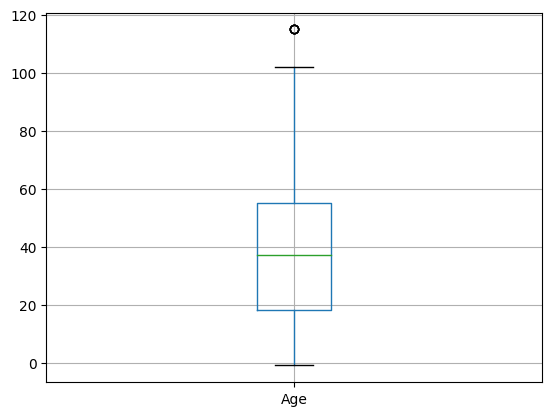

In [28]:
#Boxplot
df_citas[['Age']].boxplot()


In [29]:
#Boxplot
#df_citas[['DaysDiff']].boxplot()

<AxesSubplot: >

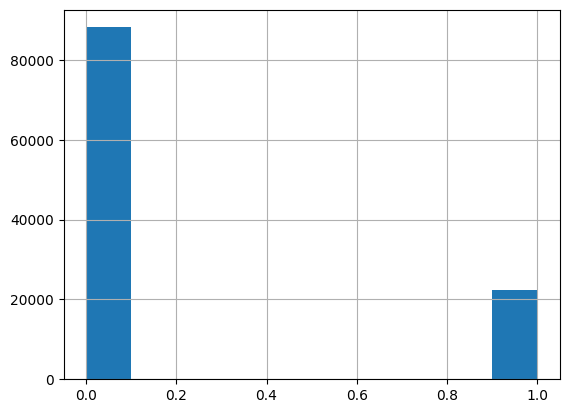

In [30]:
df_citas['Noshow'].hist()

In [31]:
df_citas['Scholarship'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    90.2%
1     9.8%
Name: Scholarship, dtype: object

In [32]:
df_citas['Hipertension'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    80.3%
1    19.7%
Name: Hipertension, dtype: object

In [33]:
df_citas['Diabetes'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    92.8%
1     7.2%
Name: Diabetes, dtype: object

In [34]:
# CHAOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
df_citas['Alcoholism'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    97.0%
1     3.0%
Name: Alcoholism, dtype: object

In [35]:
# CHAOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
df_citas['Handcap'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    98.0%
1     1.8%
2     0.2%
3     0.0%
4     0.0%
Name: Handcap, dtype: object

In [36]:
df_citas['SMS_received'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    67.9%
1    32.1%
Name: SMS_received, dtype: object

In [37]:
df_citas['Noshow'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    79.8%
1    20.2%
Name: Noshow, dtype: object

<AxesSubplot: >

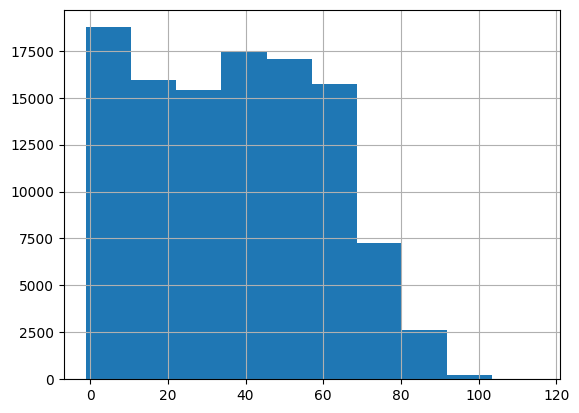

In [38]:
df_citas['Age'].hist()

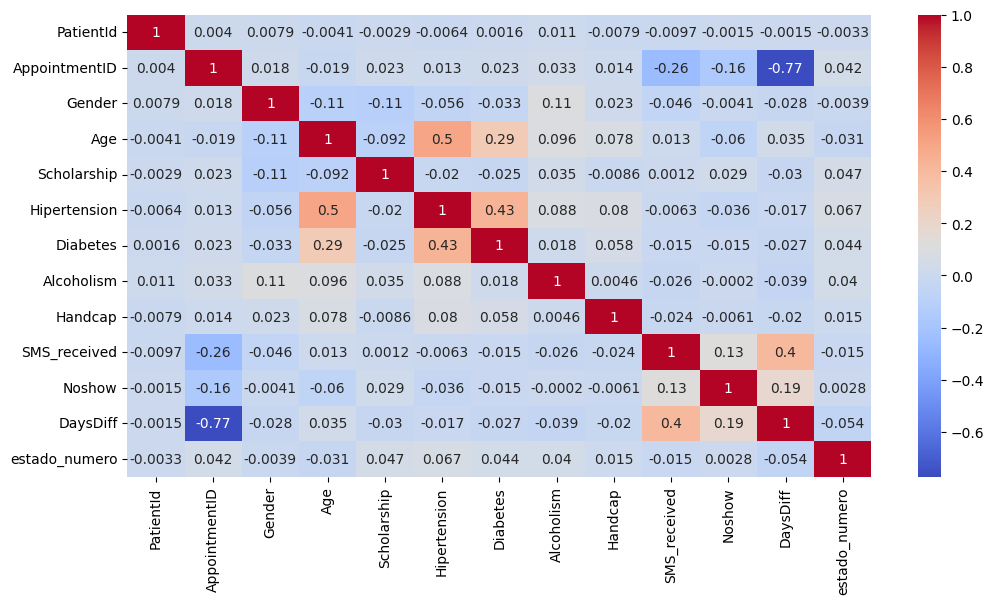

In [39]:
# Graficamos la Correlacion de las variables
plt.figure(figsize=(12,6))
sns.heatmap(df_corr,annot=True,cmap="coolwarm"); 


In [40]:
df_citas

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow,DaysDiff,Estado,estado_numero
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,-1,Espirito Santo,1.0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,-1,Espirito Santo,1.0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,-1,Espirito Santo,1.0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,-1,Espirito Santo,1.0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,-1,Espirito Santo,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,34,Espirito Santo,1.0
110523,3.596266e+12,5650093,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,34,Espirito Santo,1.0
110524,1.557663e+13,5630692,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,40,Espirito Santo,1.0
110525,9.213493e+13,5630323,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,40,Espirito Santo,1.0


In [41]:
#Se eliminan las columnas inecesarias ya que cuentan con un 90% de datos en 0 
df_citas.drop(['Diabetes','Alcoholism','Handcap'], axis = 1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,SMS_received,Noshow,DaysDiff,Estado,estado_numero
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,-1,Espirito Santo,1.0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,-1,Espirito Santo,1.0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,-1,Espirito Santo,1.0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,-1,Espirito Santo,1.0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,0,0,-1,Espirito Santo,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,1,0,34,Espirito Santo,1.0
110523,3.596266e+12,5650093,0,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,1,0,34,Espirito Santo,1.0
110524,1.557663e+13,5630692,0,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,1,0,40,Espirito Santo,1.0
110525,9.213493e+13,5630323,0,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,1,0,40,Espirito Santo,1.0


In [42]:
#Instanciamos el modelo
##lm = LinearRegression(fit_intercept=True, normalize=True)

In [43]:
df_citas.shape 

(110527, 17)

In [44]:
#wrong filter
#finalDf = df_citas[['PatientId', 'AppointmentID','Gender','Age','Scholarship','Hipertension','SMS_received','DaysDiff','Noshow']]

finalDf=df_citas[['Gender','Age','Scholarship','Hipertension','SMS_received','DaysDiff','Noshow']]
#Separate train and testing
totalRows=110527
testRate=0.2

test=finalDf.tail(int(totalRows*testRate))
train=finalDf.head(int(totalRows*(1-testRate)))

train_x=train.drop(columns=['Noshow'])
train_y=train.Noshow

test_x=test.drop(columns=['Noshow'])
test_y=test.Noshow


In [45]:
#Neural network setup
def compileNeuralNetwork(train_x,train_y):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',input_dim=6,),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu',input_dim=6,),
    tf.keras.layers.Dense(30, activation='relu',input_dim=6,),
    tf.keras.layers.Dense(10, activation='relu',input_dim=6,),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(train_x, train_y, epochs=3, batch_size=32)
    return model


#confusion Matrix logic
def showConfusionMatrix(input_1,input_2):
    confusion_matrix = metrics.confusion_matrix(input_1,input_2)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    
#normalize result
def convertNormalize(result):
    tempConvert=[]
    for i in result:
        if(isinstance(i,int)):
            tempConvert.append(int(i))
        else:
            b=float(i)
            if(b>0.5):
                print(b)
            tempConvert.append(int(round(b)))
    return tempConvert

In [46]:
#compile model from config
if(modelName=="nn"):
    model=compileNeuralNetwork(train_x,train_y)
else:
    if(modelName=="gauss"):
        model = GaussianNB()
    if(modelName=="randomForest"):
        model=RandomForestClassifier()
    model.fit(train_x, train_y)

Epoch 1/3
2764/2764 [==============================] - 3s 856us/step - loss: 0.4579 - accuracy: 0.7949
Epoch 2/3
2764/2764 [==============================] - 2s 786us/step - loss: 0.4523 - accuracy: 0.7949
Epoch 3/3
2764/2764 [==============================] - 2s 783us/step - loss: 0.4514 - accuracy: 0.7949


691/691 [==============================] - 0s 548us/step


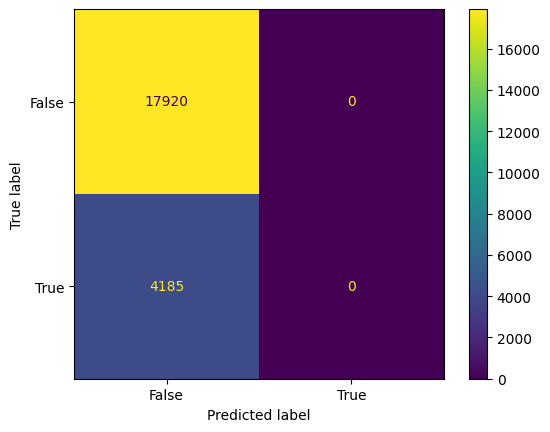

In [47]:
rawResult=model.predict(test_x)
result=convertNormalize(rawResult)
showConfusionMatrix(test_y,result)

In [48]:
#metrics
accuracy=accuracy_score(result,test_y)
f1=f1_score(test_y,result,average="weighted")

In [49]:
accuracy

0.8106763175752092

In [50]:
f1

0.7259122853690319

# Results


### Gaussian

Accuracy 0.7808


F1 0.7476

### RandomForest

Accuracy 0.7715


F1 0.7437

### Neural Network

Accuracy 0.8106


F1 0.7264

2764/2764 [==============================] - 2s 544us/step


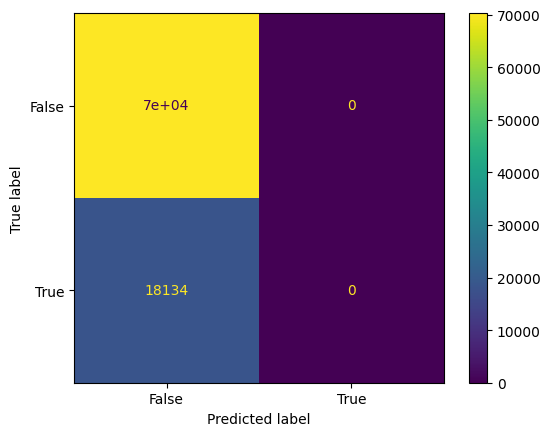

In [52]:
trainRawResult=model.predict(train_x)
trainResult=convertNormalize(rawResult)
showConfusionMatrix(train_y,result)

In [ ]:
accuracy=accuracy_score(result,test_y)
f1=f1_score(test_y,result,average="weighted")